# Agents (with agents as plugins)

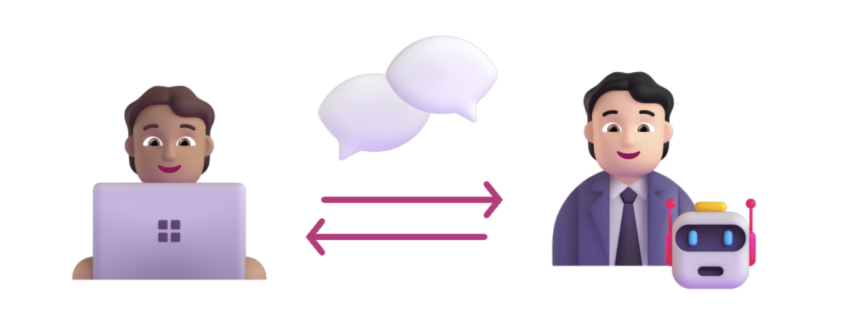

### Initialize the kernel

In [1]:
#r "nuget: Microsoft.SemanticKernel, 1.7.1"
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha"
#r "nuget: Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha"

#!import Settings.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Connectors.OpenAI;

var kernel = Settings.InitializeKernel();

Installed Packages Microsoft.SemanticKernel, 1.7.1 Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha

Error: (3,19): error CS0246: The type or namespace name 'Kernel' could not be found (are you missing a using directive or an assembly reference?)
(15,19): error CS0246: The type or namespace name 'AzureOpenAIChatCompletionService' could not be found (are you missing a using directive or an assembly reference?)
(5,22): error CS0103: The name 'Kernel' does not exist in the current context
(17,20): error CS0246: The type or namespace name 'AzureOpenAIChatCompletionService' could not be found (are you missing a using directive or an assembly reference?)

Error: (6,14): error CS0103: The name 'Settings' does not exist in the current context

### One agent with more agents as plugins

In [ ]:
List<IAgent> agents = [];

var newsPlugin = KernelPluginFactory.CreateFromType<AlertsPlugin>();

var jackAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/AsPluginsAgents.JackSparrowDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync());

var yodaAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/AsPluginsAgents.YodaDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync());

var dialogWriterAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/AsPluginsAgents.DialogWriterAgent.yaml")
    .WithPlugin(jackAgent.AsPlugin())
    .WithPlugin(yodaAgent.AsPlugin())
    .WithPlugin(shakespeareAgent.AsPlugin())
    .WithPlugin(quijoteAgent.AsPlugin())
    .BuildAsync());

var goal = """
[Verbal actions]
Jack Sparrow, Shakespeare, Don Quijote, and Yoda are having a feast. Don Quijote likes coca-cola! All making remarks about their favorite drinks.
Jack Sparrow makes a bad joke about Don Quijote's taste in drinks.
Jack Sparrow gets a threat from Don Quijote and Don Quijote is launching a fake attack.
Shakespeare sends strong words to Jack Sparrow but Jack Sparrow answers bravely and provocatively.
Yoda warns Jack Sparrow, but Jack Sparrow slaps Don Quijote.
Yoda hurts Jack Sparrow with an energy blast, resulting in an epic victory.
Jack Sparrow dies and Don Quijote falls down to his knees weeping for Jack Sparrow.
Shakespeare, Yoda or Don Quijote responds with 'VICTORY!'
Yoda tells an epitaph for Jack Sparrow, Don Quijote says nothing.
""";

Log.Information("DIALOG START (agents as plugins)");
Log.Information("******************************");

await foreach (IChatMessage message in dialogWriterAgent.InvokeAsync(goal))
{
    var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
    Console.ForegroundColor = ConsoleColor.DarkGray;
    Console.WriteLine($"{message.Role} [{message.Id}] [{message.AgentId}] >");
    Console.ResetColor();
    PrintHelper.PrintColoredLines(lines);
}

IAgent Track(IAgent agent)
{
    agents.Add(agent);

    return agent;
}

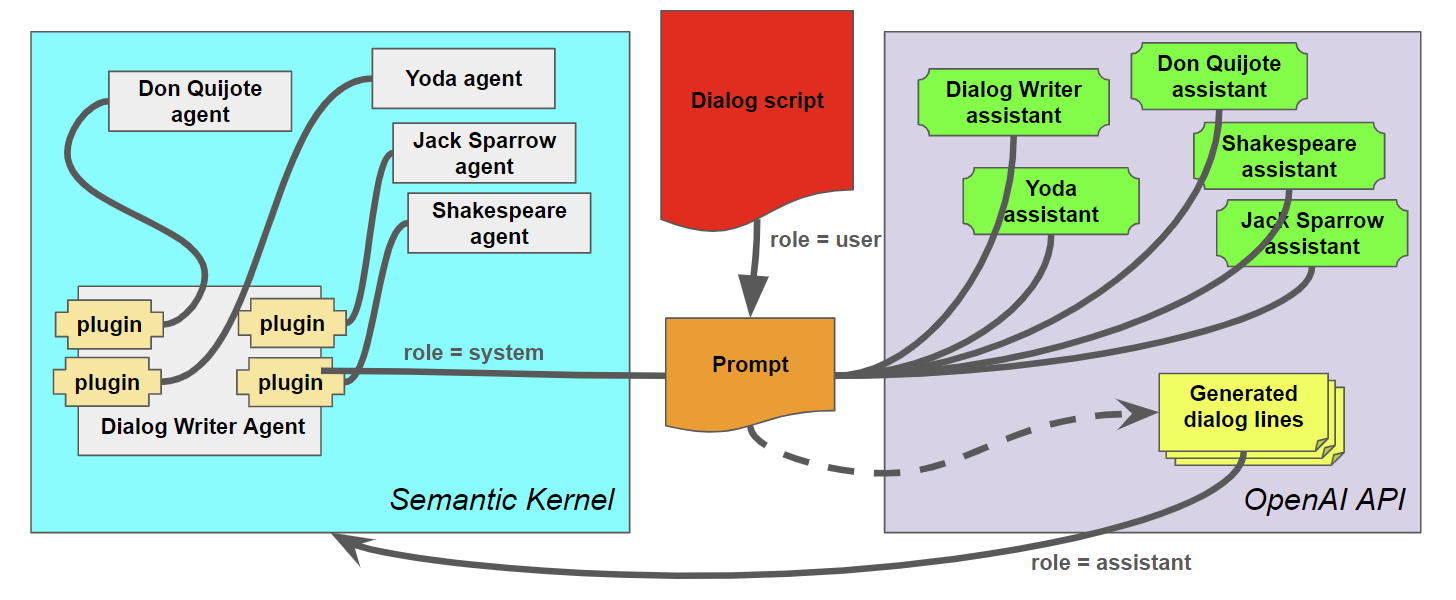